In [77]:
import matplotlib.pyplot as plt
import numpy as np
from util.functions import get_data_ticker, dias_uteis_entre_datas, decompor_sinal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

EMPRESA = 'PETR4.SA'

## Obter dados

In [78]:
dados = get_data_ticker(EMPRESA, period='5y')
dados.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [79]:
from sklearn.model_selection import train_test_split

trend = decompor_sinal(dados['Close'], period=240).trend.dropna()
train_trend, test_trend = trend[:int(len(trend)*1)], trend[int(len(trend)*1):]

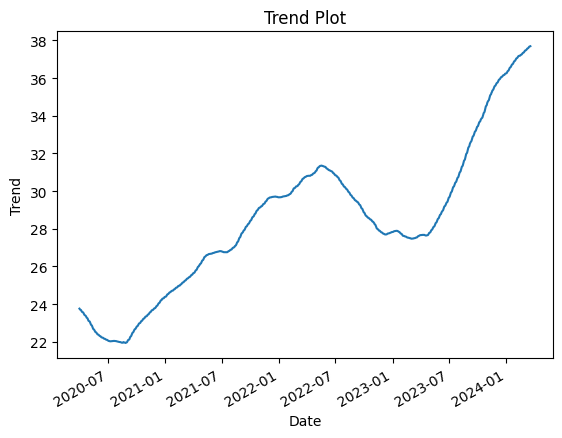

In [80]:
train_trend.plot()
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Plot')
plt.show()

In [81]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# model = ARIMA(train_trend, order=(0, 2, 1))
order = auto_arima(train_trend, seasonal=False).order
model = ARIMA(train_trend, order=order)
model_fit = model.fit()

/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


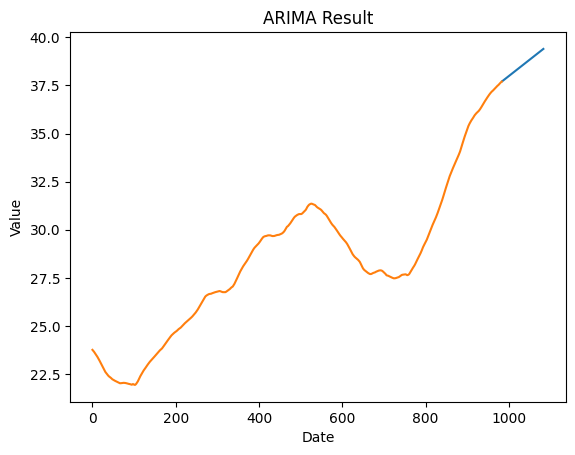

In [82]:
import pandas as pd
arima_result = model_fit.get_forecast(steps=100)
arima_result = pd.Series(list(arima_result.predicted_mean), index=range(len(train_trend), len(train_trend)+100))
arima_result.plot()
trend.index = range(len(train_trend))
trend.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Result')
plt.show()